В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [88]:
cars_df = pd.read_csv('./cars.csv')

cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [73]:
display(
    cars_df.dtypes,
    cars_df["Brand"].unique(),
    cars_df["Model"].unique(),
    cars_df["Fuel_Type"].unique(),
    cars_df["Transmission"].unique(),
    cars_df["Owner_Type"].unique(),
       )

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
Fuel_Code             int64
Transmission_Code     int64
dtype: object

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

array(['Petrol', 'Diesel'], dtype=object)

array(['Manual', 'Automatic'], dtype=object)

array(['First', 'Second', 'Third'], dtype=object)

So in result we have:

 - 13 columns:
   - 8 numeric columns
   - 4 multicategorial columns 
   - 1 categorial where categories can be realted as numbers (Owner_Type)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [48]:
inputs = cars_df.drop(columns=["Price"])
targets = cars_df["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [86]:
#1

fuel_map = {"Petrol": 0 , "Diesel": 1}

X_train["Fuel_Code"] = X_train["Fuel_Type"].map(fuel_map)
X_test["Fuel_Code"] = X_test["Fuel_Type"].map(fuel_map)


transmission_map = {"Manual": 0, "Automatic": 1}

X_train["Transmission_Code"] = X_train["Transmission"].map(transmission_map)
X_test["Transmission_Code"] = X_test["Transmission"].map(transmission_map)


X_train, X_test

(    Car_ID       Brand     Model  Year  Kilometers_Driven Fuel_Type  \
 83      84  Volkswagen     T-Roc  2019              22000    Petrol   
 55      56        Audi        A5  2018              28000    Diesel   
 26      27        Audi        A6  2018              28000    Petrol   
 54      55  Volkswagen     Vento  2017              32000    Petrol   
 19      20    Mercedes       GLC  2017              26000    Petrol   
 ..     ...         ...       ...   ...                ...       ...   
 3        4      Maruti     Swift  2020              30000    Diesel   
 2        3        Ford   Mustang  2017              20000    Petrol   
 6        7    Mahindra   Scorpio  2018              45000    Diesel   
 27      28         BMW        X3  2019              22000    Diesel   
 75      76         BMW  7 Series  2019              22000    Diesel   
 
    Transmission Owner_Type  Mileage  Engine  Power  Seats  Owner_Type_Codes  \
 83    Automatic     Second       18    1498    148   

In [90]:
#2
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

one_hot_train = enc.transform(X_train[['Brand']]).toarray()
one_hot_test = enc.transform(X_test[['Brand']]).toarray()


X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test

X_train, X_test


(    Car_ID       Brand     Model  Year  Kilometers_Driven Fuel_Type  \
 83      84  Volkswagen     T-Roc  2019              22000    Petrol   
 55      56        Audi        A5  2018              28000    Diesel   
 26      27        Audi        A6  2018              28000    Petrol   
 54      55  Volkswagen     Vento  2017              32000    Petrol   
 19      20    Mercedes       GLC  2017              26000    Petrol   
 ..     ...         ...       ...   ...                ...       ...   
 3        4      Maruti     Swift  2020              30000    Diesel   
 2        3        Ford   Mustang  2017              20000    Petrol   
 6        7    Mahindra   Scorpio  2018              45000    Diesel   
 27      28         BMW        X3  2019              22000    Diesel   
 75      76         BMW  7 Series  2019              22000    Diesel   
 
    Transmission Owner_Type  Mileage  Engine  ...  BMW  Ford  Honda  Hyundai  \
 83    Automatic     Second       18    1498  ...  0.0

In [84]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [92]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,2.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,2.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [152]:
train_data = pd.concat([X_train.select_dtypes(include=["int64", "float64"]), Y_train], axis=1)

train_data

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Owner_Type_Codes,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Price
83,84,2019,22000,18,1498,148,5,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2020,30000,23,1248,74,5,2.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,600000
2,3,2017,20000,10,4951,395,4,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000
6,7,2018,45000,15,2179,140,7,1.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,900000
27,28,2019,22000,18,1995,187,5,1.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2800000


In [154]:
def buildCorrelationPlot(featureName):
    plt.plot(train_data[featureName], train_data["Price"], "o")
    
    plt.xlabel(featureName)
    plt.ylabel("Price")
    
    plt.title(f"Correlation between {featureName} and Price")
    
    plt.show()


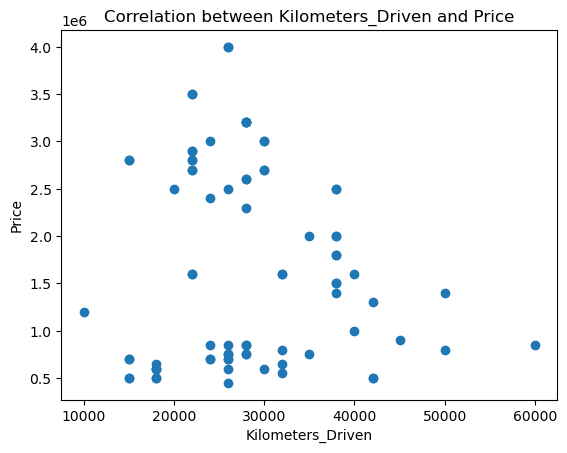

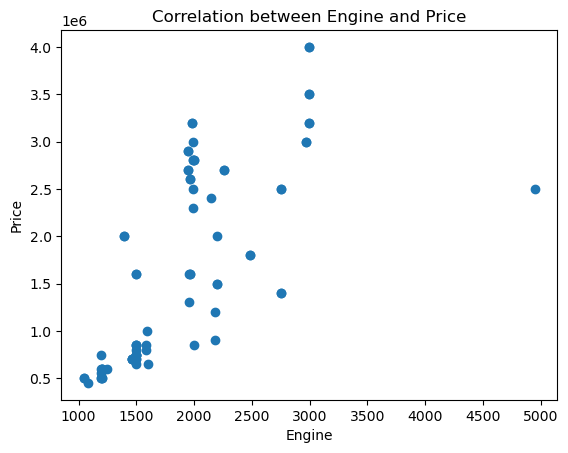

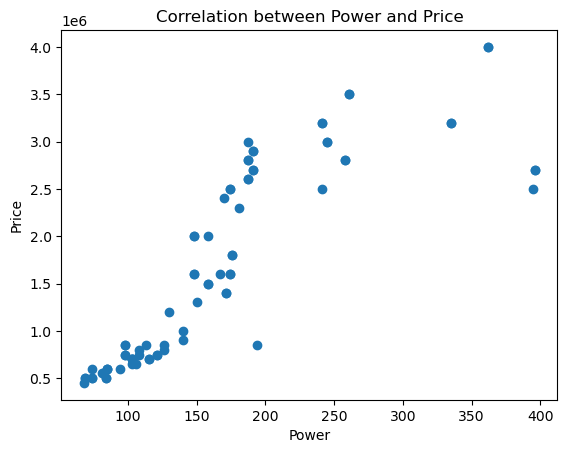

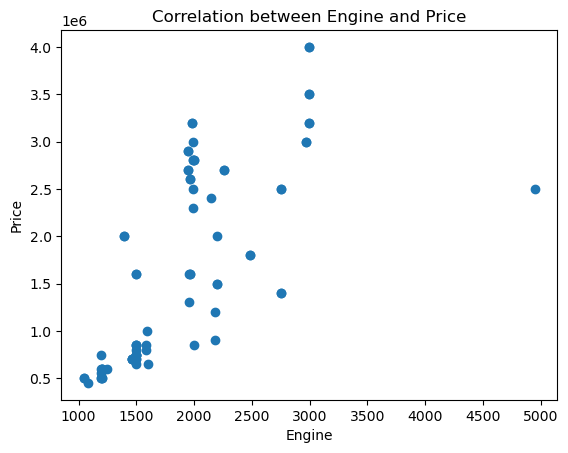

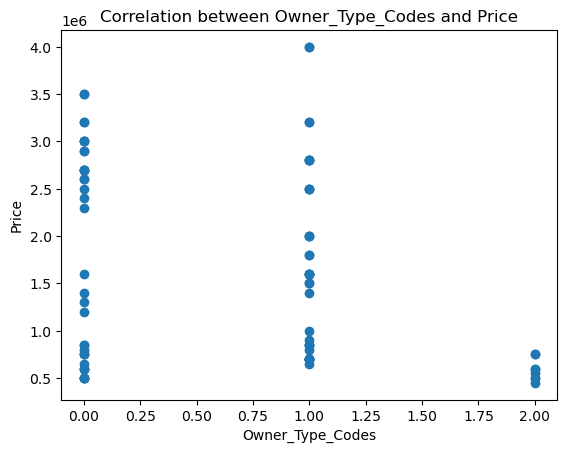

In [158]:
buildCorrelationPlot("Kilometers_Driven")
buildCorrelationPlot("Engine")
buildCorrelationPlot("Power")
buildCorrelationPlot("Engine")
buildCorrelationPlot("Owner_Type_Codes")

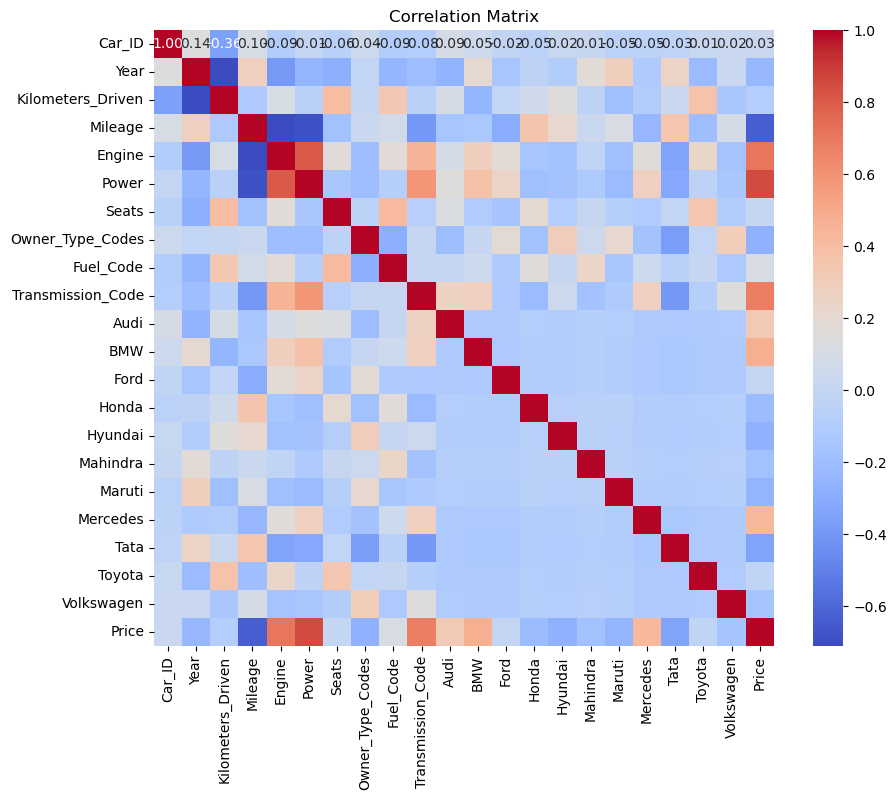

In [162]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Here we can clearly see the correlation Power/Price, Engine/Price, also Transmission_Code/Price. I belive those 3 features will be the most influential and statistically significant.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [250]:
#Delete non-numeric features from data
X_train_numeric = X_train.select_dtypes(include=[int, float])

X_test_numeric = X_test.select_dtypes(include=[int, float])


X_train = X_train_numeric
X_test = X_test_numeric

print(X_train.head())
print(X_test.head())

    Year  Kilometers_Driven  Mileage  Engine  Power  Seats  Owner_Type_Codes  \
83  2019              22000       18    1498    148      5               1.0   
55  2018              28000       17    1968    187      5               0.0   
26  2018              28000       15    1984    241      5               0.0   
54  2017              32000       18    1598    103      5               1.0   
19  2017              26000       12    1991    241      5               1.0   

    Fuel_Code  Transmission_Code  Audi  BMW  Ford  Honda  Hyundai  Mahindra  \
83          0                  1   0.0  0.0   0.0    0.0      0.0       0.0   
55          1                  1   1.0  0.0   0.0    0.0      0.0       0.0   
26          0                  1   1.0  0.0   0.0    0.0      0.0       0.0   
54          0                  0   0.0  0.0   0.0    0.0      0.0       0.0   
19          0                  1   0.0  0.0   0.0    0.0      0.0       0.0   

    Maruti  Mercedes  Tata  Toyota  Volkswag

Loss train: 210342.80162046393
Loss test: 259601.26542723444


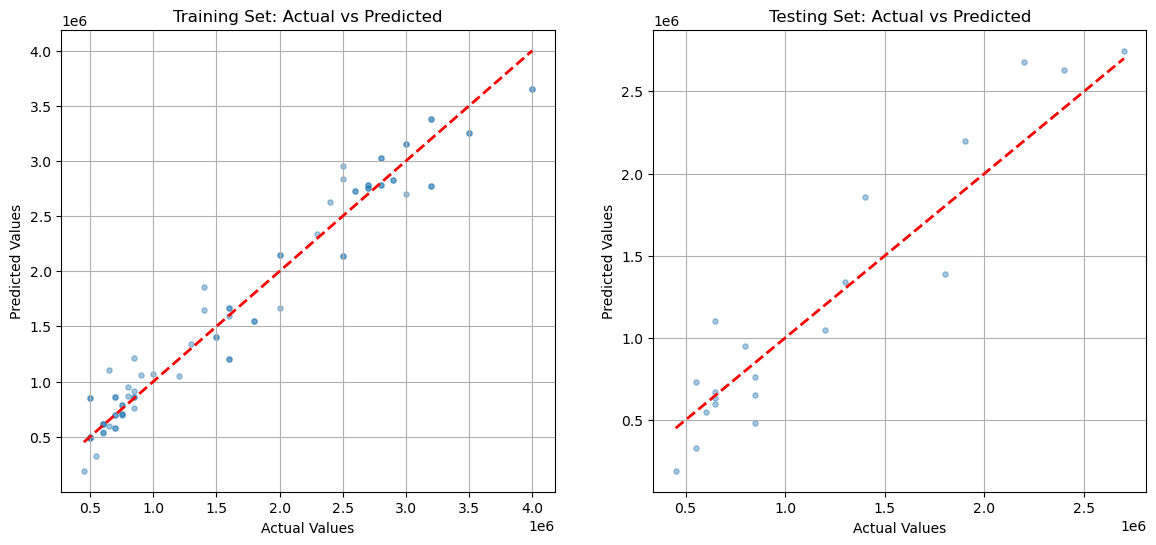

In [252]:
model = LinearRegression().fit(X_train, Y_train)

predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)


loss_train = mean_squared_error(Y_train, predictions_train, squared=False)

loss_test = mean_squared_error(Y_test, predictions_test, squared=False)
print('Loss train:', loss_train)
print('Loss test:', loss_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, predictions_train, alpha=0.4, s=14)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(Y_test, predictions_test, alpha=0.4, s=14)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Testing Set: Actual vs Predicted')
plt.grid(True)

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [256]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression().fit(X_train_scaled, Y_train)

predictions_test_scaled = model_scaled.predict(X_test_scaled)
predictions_train_scaled = model_scaled.predict(X_train_scaled)

loss_train_scaled = mean_squared_error(Y_train, predictions_train_scaled, squared=False)

loss_test_scaled = mean_squared_error(Y_test, predictions_test_scaled, squared=False)
print('Loss train:', loss_train_scaled)
print('Loss test:', loss_test_scaled)

print(model_scaled.coef_, model_scaled.intercept_)

weights_df = pd.DataFrame({
    'feature': X_train.columns,
    'weight': model.coef_
})
weights_df.sort_values('weight', ascending=False)

Loss train: 210342.80162046404
Loss test: 259601.2654272347
[ -11604.26097548  -99713.958682   -131884.63312348  -24683.08408026
  500000.50676501   -1744.04881186   43335.06607908  185245.84076303
  115153.43959914  206123.09210832  208105.07973844 -119069.15582957
  -63112.33984959 -151916.05247346 -140931.63285475 -112786.6736133
  209257.73763646  -65558.49042335   17619.42955497  -93391.35809343] 1680000.0000000005


,feature,weight
9,Audi,758803.045074
16,Mercedes,733974.724346
10,BMW,730326.849008
7,Fuel_Code,370607.514476
8,Transmission_Code,236367.637699
18,Toyota,130457.503230
6,Owner_Type_Codes,66278.306579
4,Power,6140.756458
1,Kilometers_Driven,-10.874437
3,Engine,-37.585874


This seems pretty logical to me, that auti, mercedes and bmw make the price much higher, and mahindra, and hyundai make it much cheaper it is a bit wierd that Owner_Type_Codes is having positive wieght.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [381]:
Y = Y_train
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=Y_train.index, columns=X_train.columns)
X = sm.add_constant(X_train_scaled_df)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.680000e+06
Year                -1.160426e+04
Kilometers_Driven   -9.971396e+04
Mileage             -1.318846e+05
Engine              -2.468308e+04
Power                5.000005e+05
Seats               -1.744049e+03
Owner_Type_Codes     4.333507e+04
Fuel_Code            1.852458e+05
Transmission_Code    1.151534e+05
Audi                 2.061231e+05
BMW                  2.081051e+05
Ford                -1.190692e+05
Honda               -6.311234e+04
Hyundai             -1.519161e+05
Mahindra            -1.409316e+05
Maruti              -1.127867e+05
Mercedes             2.092577e+05
Tata                -6.555849e+04
Toyota               1.761943e+04
Volkswagen          -9.339136e+04
dtype: float64

In [375]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.34e-34
Time:                        23:33:03   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.72e+0

In [398]:
significant_features = results.pvalues[results.pvalues < 0.05].index.tolist()
significant_features = [feature for feature in significant_features if feature != 'const']
print(significant_features)

less_significant_features = results.pvalues[results.pvalues < 0.25].index.tolist()
less_significant_features = [feature for feature in less_significant_features if feature != 'const']
print(less_significant_features)

['Mileage', 'Power', 'Fuel_Code', 'Transmission_Code', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Mercedes']
['Mileage', 'Power', 'Fuel_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes']


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [389]:
Y = Y_train
X_train_scaled_df_sign = X_train_scaled_df[significant_features]
X = sm.add_constant(X_train_scaled_df_sign)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.680000e+06
Mileage             -1.430094e+05
Power                4.556152e+05
Fuel_Code            1.337141e+05
Transmission_Code    1.310778e+05
Audi                 2.496895e+05
BMW                  2.949781e+05
Ford                -4.855211e+04
Hyundai             -1.027479e+05
Mahindra            -8.538214e+04
Maruti              -5.117881e+04
Mercedes             2.767291e+05
Volkswagen          -2.375201e+04
dtype: float64

In [393]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 29 May 2024   Prob (F-statistic):           4.12e-39
Time:                        23:36:52   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

The R2 almoust didn't change, so i suppose all the other features do not effect the result so much.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [402]:
Y = Y_train
X_train_scaled_df_less_sign = X_train_scaled_df[less_significant_features]
X = sm.add_constant(X_train_scaled_df_less_sign)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.680000e+06
Mileage             -1.421993e+05
Power                4.626808e+05
Fuel_Code            1.370569e+05
Transmission_Code    1.181112e+05
Audi                 2.583566e+05
BMW                  3.026837e+05
Ford                -4.410372e+04
Hyundai             -9.574171e+04
Mahindra            -8.275078e+04
Maruti              -4.547412e+04
Mercedes             2.850856e+05
dtype: float64

In [406]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 29 May 2024   Prob (F-statistic):           4.66e-40
Time:                        23:39:42   Log-Likelihood:                -1100.7
No. Observations:                  80   AIC:                             2225.
Df Residuals:                      68   BIC:                             2254.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.77e+0

Im not sure if im doing everything correct, but my expirience is that 0.25 threshold does not change much. 

The best model yet is the one that takes all the numeric data, but the difference is pretty small.